# Ejercicio TensorFlow 2.0

Usaremos el mismo caso visto previamente pero ahora utilizando TensorFlow.

## Cargamos las librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Generamos los datos con la misma lógica que en el ejercicio previo.

Con una diferencia.  En el mundo real, lo habitual es cargar los datos a través de un csv, bbdd, ...
Vamos a recrear la carga de los datos que hayamos generado de manera aleatoria, guardándolos en formato npz.
El formato npz es un formato Numpy, que permite guardar arrays en una fichero.

In [ ]:
observations = 1000

np.random.seed(123)
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

targets = 2*xs - 3*zs + 5 + noise

# Hasta aquí hemos generado los mismos datos, ahora los guardamos
np.savez('data', inputs=inputs, targets=targets)

# Resolviendo con TensorFlow

In [ ]:
# Cargamos el conjunto de datos
training_data = np.load('data.npz')

In [ ]:
# Declaramos una variable donde guardaremos el total de variables del modelo
# En nuestro caso 2 xs y zs
#input_size = 2

# Declaramos el total de variables de salida del modelo
# En nuestro caso 1
output_size = 1

# Definimos nuestro modelo como secuencial.
# En esta etapa no hay datos involucrados, sólo definimos lo que queremos hacer.
model = tf.keras.Sequential([
                            # Cada capa se lista aquí
                            # Definimos las características de la red
                            # Dense, nos permite definir la operación matemática a ejecutar xw + b
                            # Básicamente aplica la operación: output = activation(dot(input, kernel) + bias
                            tf.keras.layers.Dense(output_size,
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
                            ])

# Definimos el ratio de aprendizaje
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Definimos la función de pérdida a minimizar.  En este caso el error cuadrático medio
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

# Definimos el modelo con los datos de entrada y targets.
# Ejecutamos 100 ciclos
model.fit(training_data['inputs'], training_data['targets'], epochs=300, verbose=1)

Epoch 1/300
32/32 [==============================] - 0s 678us/step - loss: 35.4613
Epoch 2/300
32/32 [==============================] - 0s 613us/step - loss: 4.3209
Epoch 3/300
32/32 [==============================] - 0s 581us/step - loss: 1.4421
Epoch 4/300
32/32 [==============================] - 0s 678us/step - loss: 0.6428
Epoch 5/300
32/32 [==============================] - 0s 645us/step - loss: 0.4249
Epoch 6/300
32/32 [==============================] - 0s 613us/step - loss: 0.3658
Epoch 7/300
32/32 [==============================] - 0s 678us/step - loss: 0.3473
Epoch 8/300
32/32 [==============================] - 0s 710us/step - loss: 0.3473
Epoch 9/300
32/32 [==============================] - 0s 613us/step - loss: 0.3367
Epoch 10/300
32/32 [==============================] - 0s 613us/step - loss: 0.3519
Epoch 11/300
32/32 [==============================] - 0s 694us/step - loss: 0.3435
Epoch 12/300
32/32 [==============================] - 0s 738us/step - loss: 0.3357
Epoch 13/300

32/32 [==============================] - 0s 645us/step - loss: 0.3379
Epoch 100/300
32/32 [==============================] - 0s 549us/step - loss: 0.3513
Epoch 101/300
32/32 [==============================] - 0s 581us/step - loss: 0.3466
Epoch 102/300
32/32 [==============================] - 0s 613us/step - loss: 0.3431
Epoch 103/300
32/32 [==============================] - 0s 549us/step - loss: 0.3477
Epoch 104/300
32/32 [==============================] - 0s 581us/step - loss: 0.3446
Epoch 105/300
32/32 [==============================] - 0s 581us/step - loss: 0.3407
Epoch 106/300
32/32 [==============================] - 0s 581us/step - loss: 0.3437
Epoch 107/300
32/32 [==============================] - 0s 581us/step - loss: 0.3422
Epoch 108/300
32/32 [==============================] - 0s 581us/step - loss: 0.3531
Epoch 109/300
32/32 [==============================] - 0s 581us/step - loss: 0.3447
Epoch 110/300
32/32 [==============================] - 0s 581us/step - loss: 0.3377
Epoch 

32/32 [==============================] - 0s 613us/step - loss: 0.3447
Epoch 197/300
32/32 [==============================] - 0s 581us/step - loss: 0.3367
Epoch 198/300
32/32 [==============================] - 0s 548us/step - loss: 0.3384
Epoch 199/300
32/32 [==============================] - 0s 581us/step - loss: 0.3386
Epoch 200/300
32/32 [==============================] - 0s 548us/step - loss: 0.3353
Epoch 201/300
32/32 [==============================] - 0s 548us/step - loss: 0.3423
Epoch 202/300
32/32 [==============================] - 0s 581us/step - loss: 0.3406
Epoch 203/300
32/32 [==============================] - 0s 645us/step - loss: 0.3455
Epoch 204/300
32/32 [==============================] - 0s 581us/step - loss: 0.3386
Epoch 205/300
32/32 [==============================] - 0s 533us/step - loss: 0.3435
Epoch 206/300
32/32 [==============================] - 0s 613us/step - loss: 0.3414
Epoch 207/300
32/32 [==============================] - 0s 581us/step - loss: 0.3454
Epoch 

32/32 [==============================] - 0s 613us/step - loss: 0.3417
Epoch 294/300
32/32 [==============================] - 0s 581us/step - loss: 0.3403
Epoch 295/300
32/32 [==============================] - 0s 645us/step - loss: 0.3400
Epoch 296/300
32/32 [==============================] - 0s 581us/step - loss: 0.3411
Epoch 297/300
32/32 [==============================] - 0s 581us/step - loss: 0.3403
Epoch 298/300
32/32 [==============================] - 0s 613us/step - loss: 0.3381
Epoch 299/300
32/32 [==============================] - 0s 549us/step - loss: 0.3411
Epoch 300/300
32/32 [==============================] - 0s 581us/step - loss: 0.3474


## Extraemos los pesos y bias

La extracción de pesos y bias del modelo no es necesaria en el proceso de machine learning.  De hecho, no se ejecuta habitualmente, pero en este ejemplo simple nos sirve para comprobar que los resultados son correctos.

In [ ]:
# La extracción de pesos y biases es muy sencilla
model.layers[0].get_weights()

[array([[ 2.0367558],
        [-2.9931653]], dtype=float32),
 array([4.9902945], dtype=float32)]

In [ ]:
weights = model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]
print(weights)
print(bias)

# éste es un modelo simple, pero en otros más complicados podemos tener cientos o miles de valores en estas variables

[[ 2.0367558]
 [-2.9931653]]
[4.9902945]


## Generar las predicciones

In [ ]:
# Datos predichos
model.predict_on_batch(training_data['inputs']).round(1)

array([[ 37.7],
       [ -3.6],
       [  6. ],
       [ -1.1],
       [ 14.2],
       [ 29. ],
       [ 35.7],
       [ 13.3],
       [ -0. ],
       [ 23.7],
       [-10.4],
       [ 23.7],
       [ 21. ],
       [-31.3],
       [ 26.1],
       [-10.3],
       [-20.4],
       [ -7.1],
       [ 35. ],
       [ 12.8],
       [  2. ],
       [ -1.5],
       [  7.4],
       [ 15.6],
       [ 17.4],
       [-24.3],
       [  8. ],
       [ 19.2],
       [ -0.2],
       [-18.8],
       [ -5. ],
       [ 20.2],
       [ 28.8],
       [ 24. ],
       [ 12.2],
       [ -7.2],
       [ -7.8],
       [ 48.3],
       [ -2.1],
       [ 20.6],
       [ 30.8],
       [-12.9],
       [-13.1],
       [ 12.8],
       [ 10.3],
       [  6.7],
       [-19.3],
       [  2.9],
       [ 31. ],
       [ 30.2],
       [-22.5],
       [ 48. ],
       [ -9.6],
       [ 15.3],
       [-15.9],
       [ 23.6],
       [ 18.6],
       [ 37.8],
       [ 39.5],
       [ 12.2],
       [ 12.6],
       [-15.9],
       [

In [ ]:
# Datos reales
training_data['targets'].round(1)

array([[ 37.8],
       [ -3.5],
       [  5.8],
       [ -0.6],
       [ 14.1],
       [ 30.3],
       [ 35.4],
       [ 12.7],
       [ -0.1],
       [ 23.6],
       [-10.9],
       [ 23.2],
       [ 21.9],
       [-30.7],
       [ 27.4],
       [-11.2],
       [-19.7],
       [ -7.4],
       [ 36.5],
       [ 13.6],
       [  2.5],
       [ -3.2],
       [  6.2],
       [ 15.7],
       [ 17.7],
       [-24. ],
       [  7.9],
       [ 20.2],
       [ -0.3],
       [-19.5],
       [ -4. ],
       [ 19.9],
       [ 29.8],
       [ 23.7],
       [ 11.6],
       [ -6.3],
       [ -8.4],
       [ 48.1],
       [ -2.5],
       [ 21.2],
       [ 30.8],
       [-11.5],
       [-13.5],
       [ 13.1],
       [  9.6],
       [  7.5],
       [-20.8],
       [  1.3],
       [ 31.5],
       [ 30.4],
       [-21.4],
       [ 48.5],
       [ -9.3],
       [ 14.9],
       [-16.7],
       [ 23.9],
       [ 19.4],
       [ 37.5],
       [ 39.6],
       [ 12.7],
       [ 11.4],
       [-16. ],
       [

## Pintamos los datos

In [ ]:
np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets'])

(array([ 3.80226707e+01, -3.42440033e+00,  6.50129509e+00, -1.29976845e+00,
         1.39342232e+01,  2.96319160e+01,  3.54314537e+01,  1.31743078e+01,
        -1.08807564e-01,  2.42493973e+01, -1.03756447e+01,  2.36774330e+01,
         2.14694099e+01, -3.12241440e+01,  2.66607437e+01, -1.10423784e+01,
        -2.02912140e+01, -6.76901340e+00,  3.55390701e+01,  1.28642569e+01,
         1.73715830e+00, -2.26128387e+00,  7.08376646e+00,  1.56364212e+01,
         1.72027931e+01, -2.45681877e+01,  8.25848198e+00,  1.99521694e+01,
         1.90229416e-02, -1.95137901e+01, -4.42816448e+00,  2.06643620e+01,
         2.94039955e+01,  2.44299469e+01,  1.25010691e+01, -7.10381222e+00,
        -7.92246342e+00,  4.83834190e+01, -3.02797794e+00,  2.08906746e+01,
         3.10478401e+01, -1.25130873e+01, -1.30834761e+01,  1.30592165e+01,
         9.76862907e+00,  7.13931465e+00, -1.97761230e+01,  1.97998333e+00,
         3.14537468e+01,  3.05171280e+01, -2.23198891e+01,  4.82082863e+01,
        -1.0

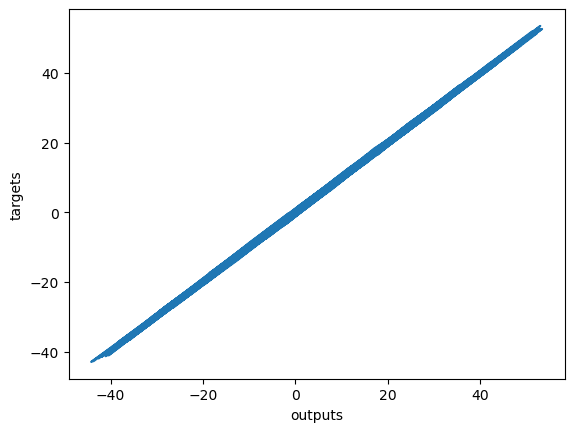

In [ ]:
# Usamos np.squeeze para poder ajustar los datos a lo que espera plt.plot
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

# La idea de haber usado TensorFlow para el mismo ejercicio y poder comparar las líneas de código necesarias
# para obtener el mismo resultado.  Muchas menos en TensorFlow
